# Face bounding box detection

# Setup

In [28]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from scipy.spatial import distance

# Load imag

In [29]:
img_g = cv2.imread('filter_0_applied_1_11.jpg',0)

In [30]:
img_g

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [31]:
cv2.imshow('image',img_g)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Draw image function

In [32]:
def plot_img(img):
    plt.figure(figsize = (15,7))
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

# Convert to Binary values

In [33]:
(thresh, im_bw) = cv2.threshold(img_g, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img = cv2.threshold(img_g, thresh, 255, cv2.THRESH_BINARY)[1]

In [34]:
np.unique(im_bw)

array([  0, 255], dtype=uint8)

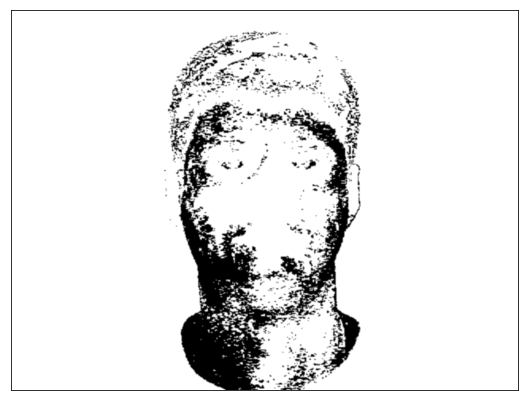

In [35]:
plot_img(img)

# Mean of image based on Java code

In [36]:
mean_x = 323 
mean_y = 269

In [37]:
img[mean_x][mean_y] = 0

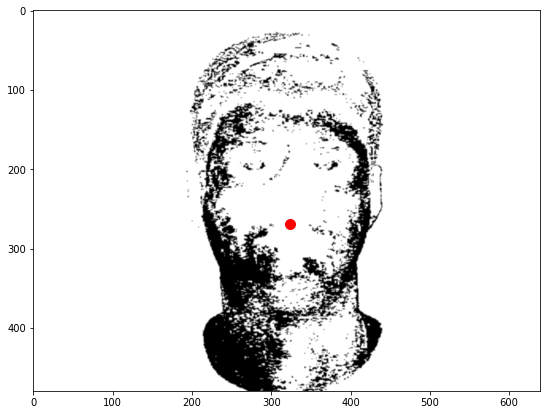

In [38]:
plt.figure(figsize = (15,7))
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.plot([mean_x], [mean_y], marker='o', markersize=10, color="red")
plt.show()

# Dilation and Erosion

In [39]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)

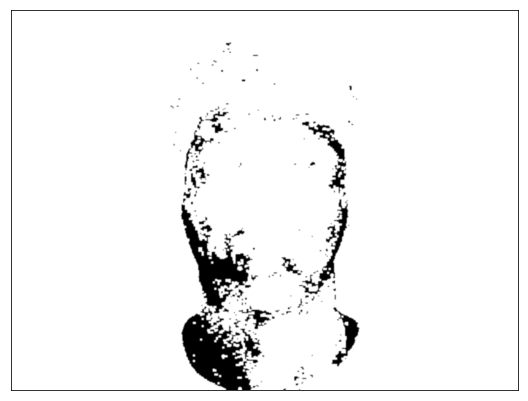

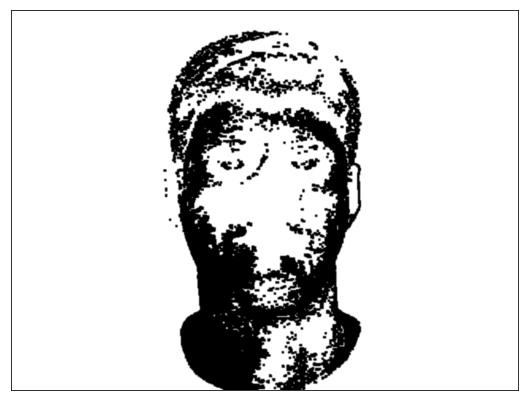

(None, None)

In [40]:
plot_img(dilation), plot_img(erosion)

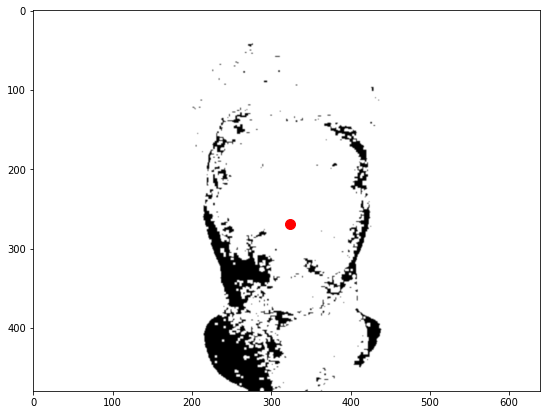

In [41]:
plt.figure(figsize = (15,7))
plt.imshow(dilation, cmap = 'gray', interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.plot([mean_x], [mean_y], marker='o', markersize=10, color="red")
plt.show()

# Draw Contour of Dialated image

In [42]:
# imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(dilation,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [43]:
#draw all the contours in an image:
cv2.drawContours(dilation, contours, -1, (0,255,0), 3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [44]:
# draw an individual contour, say 4th contour:
cv2.drawContours(dilation, contours, 3, (0,255,0), 3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [45]:
cnt = contours[4]
cv2.drawContours(dilation, [cnt], 0, (0,255,0), 3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

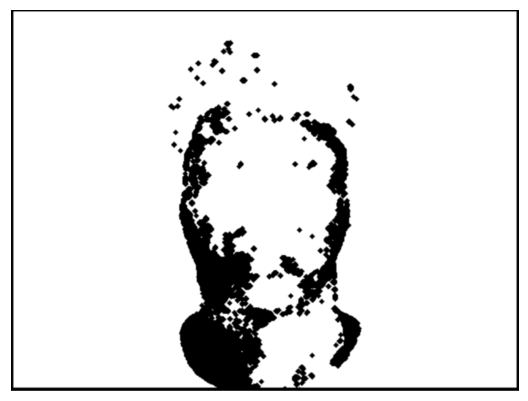

In [46]:
contour_img = cv2.drawContours(dilation, contours, -1, (0,255,0), 3)
plot_img(contour_img)

# Apply dilation 4 times to get rid of noisy pixels

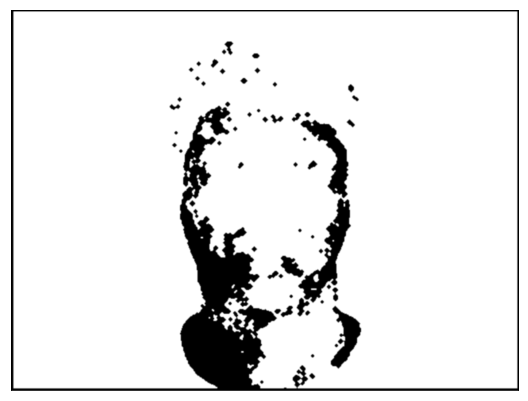

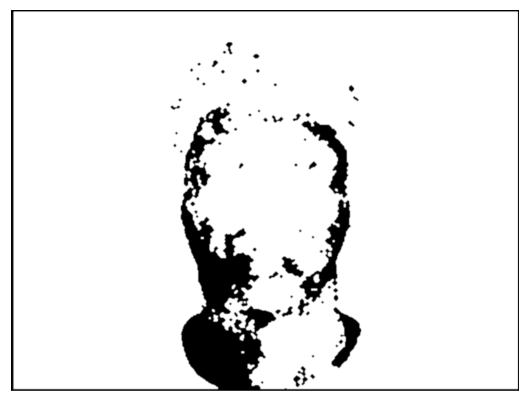

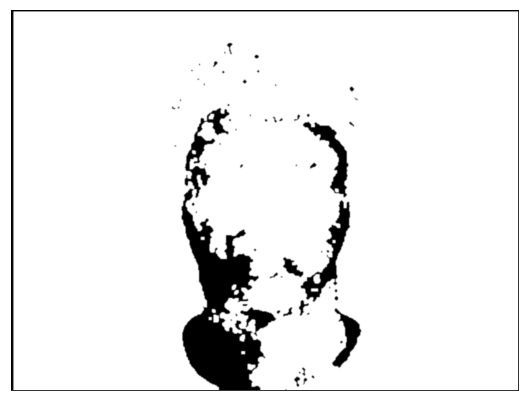

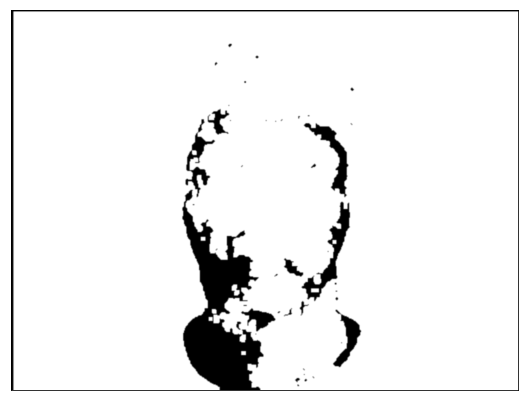

In [47]:
kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(contour_img,kernel,iterations = 1)
plot_img(dilation)

dilation = cv2.dilate(dilation,kernel,iterations = 1)
plot_img(dilation)

dilation = cv2.dilate(dilation,kernel,iterations = 1)
plot_img(dilation)

dilation = cv2.dilate(dilation,kernel,iterations = 1)
plot_img(dilation)

# move in every direction from the located mean point

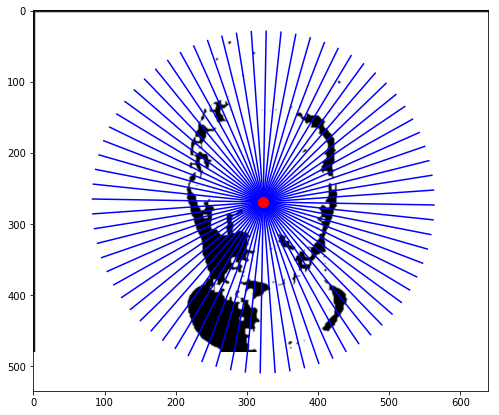

In [48]:
import math
plt.figure(figsize = (15,7))
plt.imshow(dilation, cmap = 'gray', interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.plot([mean_x], [mean_y], marker='o', markersize=10, color="red")

for rotation in range(1,360,5):
    radius =  min(len(dilation), len(dilation[0]))//2
    #print("temp rotation = ", rotation)
    endX = mean_x + radius * math.cos(rotation/180*math.pi)
    endY = mean_y + radius * math.sin(rotation/180*math.pi)
    #print("endX, endY = ", endX, ", ", endY)
    plt.plot([mean_x, endX], [mean_y, endY],  color="blue")
plt.plot([mean_x], [mean_y], marker='o', markersize=10, color="red")
plt.show()

# calculate intersection and take the nearest point to the mean

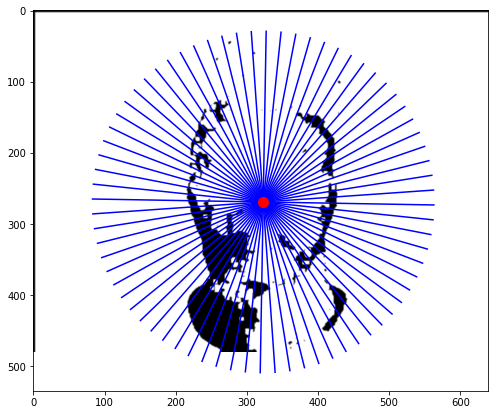

In [49]:
import math
plt.figure(figsize = (15,7))
plt.imshow(dilation, cmap = 'gray', interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
# plt.plot([mean_x], [mean_y], marker='o', markersize=10, color="red")
nearest_points = []

for rotation in range(1,360,5):
    radius = min(len(dilation), len(dilation[0]))//2 
    #print("temp rotation = ", rotation)
    endX = mean_x + radius * math.cos(rotation/180*math.pi)
    endY = mean_y + radius * math.sin(rotation/180*math.pi)
    #print("endX, endY = ", endX, ", ", endY)
    plt.plot([mean_x, endX], [mean_y, endY],  color="blue")
    
    image = dilation.copy()
    image.fill(255)
    lineThickness = 1
    line_cv = cv2.line(image, (mean_x, mean_y), ((int)(endX), (int)(endY)), 0, lineThickness)
    
    img_bwa = cv2.bitwise_or(line_cv,dilation)
    
    x_intersection, y_intersection = np.where(img_bwa == 0)
    coords = [(xx, yy) for (xx, yy) in zip(x_intersection, y_intersection)]
    
    if len(coords) > 0:
        X = [(mean_x, mean_y)]
        all_dist = distance.cdist(X, coords, 'euclidean')
        nearest_points.append(coords[np.argmin(all_dist)])

plt.plot([mean_x], [mean_y], marker='o', markersize=10, color="red")
plt.show()

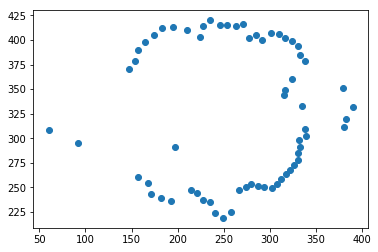

In [50]:
x,y = zip(*nearest_points)
plt.scatter(x, y)


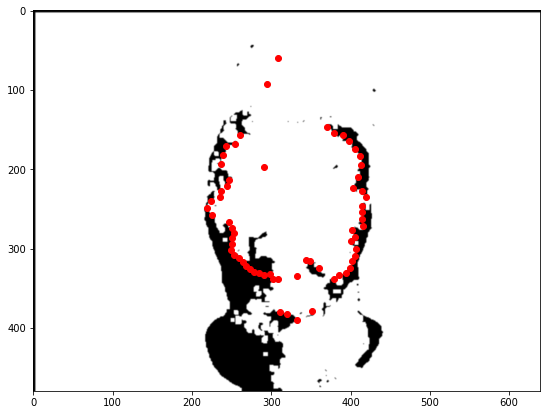

In [51]:
plt.figure(figsize = (15,7))
plt.imshow(dilation, cmap = 'gray', interpolation = 'bicubic')
x,y = zip(*nearest_points)
plt.scatter(y, x, color ="red" )
plt.show()

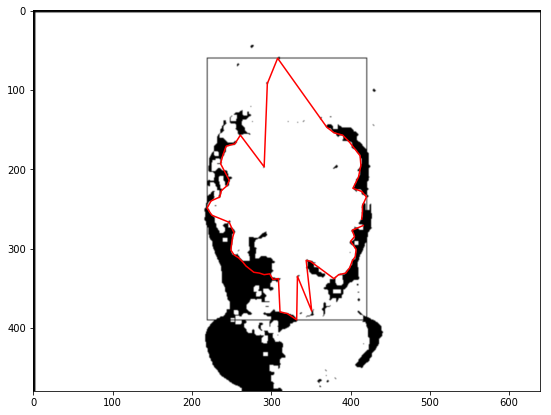

In [52]:
plt.figure(figsize = (15,7))
plt.imshow(dilation, cmap = 'gray', interpolation = 'bicubic')
y,x = zip(*nearest_points)
plt.plot(x,y, markersize=10, color="red" )

min_x = np.min(x)
max_x = np.max(x)
min_y = np.min(y)
max_y = np.max(y)

dd = dilation.copy()
# dd.fill(0)
rect_bound = cv2.rectangle(dd,(min_x,min_y),(max_x,max_y),0,0)
plt.imshow(rect_bound, cmap = 'gray',interpolation = 'bicubic')
plt.show()

---------------

In [53]:
laplacian = cv2.Laplacian(dilation,cv2.CV_64F)

In [54]:
cv2.imshow('image',laplacian)
cv2.waitKey(0)
cv2.destroyAllWindows()